In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from random import randint as rd

In [3]:
def XSort(t, i, j):
    global c
    if i >= j:
        return
    c += 1
    XSort(t, i, j-1)
    if t[j-1] > t[j]:
        tmp = t[j-1]
        t[j-1] = t[j]
        t[j]  = tmp
        c += 1
        XSort(t, i, j-1)

Pour évaluer le nombre d'appels récursif on peut utiliser une variable global

In [27]:
print(f"XSort(n){_:<8} Nb appels récursifs{_:<6} n**2.6{_:<19} 2**n")
for n in range(10, 110, 10):
    c = 1
    t = [i for i in range(n-1, -1, -1)]
    XSort(t, 0, len(t)-1)
    print(f"{n:<15}  {c:<25} {n**2.6:<25} {2**n}")
#print(f"noeuds : {2**n - 1}")

XSort(n)         Nb appels récursifs       n**2.6                    2**n
10               175                       398.1071705534973         1024
20               1350                      2413.670534618066         1048576
30               4525                      6926.522706653473         1073741824
40               10700                     14633.761661674447        1099511627776
50               20875                     26140.98881478184         1125899906842624
60               36050                     41994.58085914045         1152921504606846976
70               57225                     62698.17562629137         1180591620717411303424
80               85400                     88722.53992385877         1208925819614629174706176
90               121575                    120512.06397283185        1237940039285380274899124224
100              166750                    158489.3192461114         1267650600228229401496703205376


In [5]:
def triInsertion(T, n):
    
    for i in range(1, n):
        tmp  = T[i]
        j = i
        while j > 0 and T[j-1] > tmp:
            T[j] = T[j-1]
            j -= 1
        T[j] = tmp

In [6]:
t = [rd(0,20) for i in range (10)]
print(t)
triInsertion(t, len(t))
print(t)

[5, 0, 17, 1, 15, 6, 14, 10, 6, 19]
[0, 1, 5, 6, 6, 10, 14, 15, 17, 19]


In [9]:
def newSort(T, n):
    
    d = 1
    while 9 * d < n:
        d = 3 * d + 1
    while d > 0:
        for t in range(d):
            for i in range(t, n, d):
                tmp = T[i]
                j = i
                while( j >= d and T[j-d] > tmp):
                    T[j] = T[j-d]
                    j -= d
                T[j] = tmp
                #Décocher pour visualiser les indices des sous séquences triées.
                #Attention le nombre de valeurs dans le tableau doit être raisonnable
                #print(str(i) + " ", end = "")
        d = d // 3

In [10]:
t = [rd(0,20) for i in range (10)]
print(t)
newSort(t, len(t))
print(t)

[11, 5, 8, 4, 13, 3, 20, 14, 11, 18]
[3, 4, 5, 8, 11, 11, 13, 14, 18, 20]


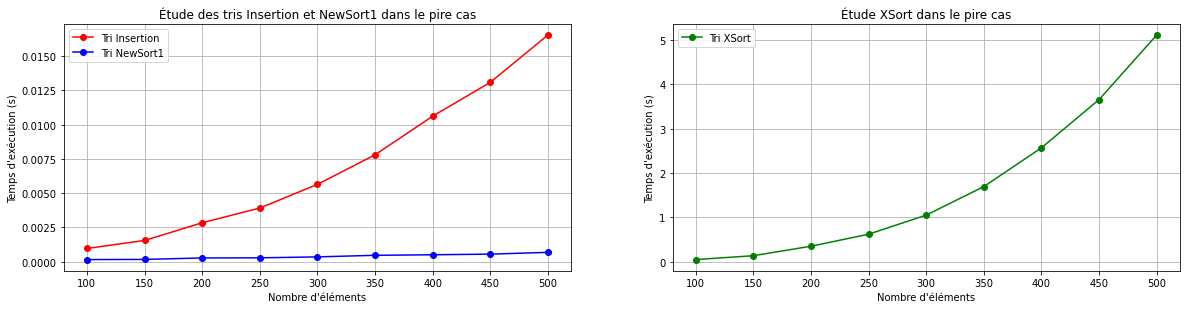

In [11]:
time_insertion = []
time_newSort = []
time_xsort = []

numberOfElement = [i for i in range(100, 501, 50)]
iteration = 10
for n in numberOfElement:
        
    intervalTI = 0
    intervalNS = 0
    intervalXS = 0
    
    for i in range(iteration):
        
        #T = [rd(0, 10*n) for i in range(n)]
        T = [i for i in range(n, -1, -1)]
    
        start = time.perf_counter()
        triInsertion(T[:], n)
        end = time.perf_counter() - start
        intervalTI += end

        start = time.perf_counter()
        newSort(T[:], n)
        end = time.perf_counter() - start
        intervalNS += end
        
        start = time.perf_counter()
        XSort(T[:], 0, len(T)-1)
        end = time.perf_counter() - start
        intervalXS += end
    
    time_insertion.append(intervalTI/iteration)
    time_newSort.append(intervalNS/iteration)
    time_xsort.append(intervalXS/iteration)


plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(numberOfElement, time_insertion, 'o-r', label="Tri Insertion")
plt.plot(numberOfElement, time_newSort, 'o-b', label = 'Tri NewSort1')
plt.grid()
plt.title("Étude des tris Insertion et NewSort1 dans le pire cas")
plt.xlabel("Nombre d'éléments")
plt.ylabel("Temps d'exécution (s)")
plt.legend()

plt.subplot(222)
plt.plot(numberOfElement, time_xsort, 'o-g', label = 'Tri XSort')
plt.grid()
plt.title("Étude XSort dans le pire cas")
plt.xlabel("Nombre d'éléments")
plt.ylabel("Temps d'exécution (s)")
plt.legend()
plt.savefig("images/etudeDansLePireCas.png")

plt.show()

On vérifie (ou pas) les hypothèses des ordres de grandeur de complexité temporelle pour les différents tris

In [14]:
def partition(n, k):
    
    part = k*[1]
    if k < n:
        for i in range(k):
            total = sum(part)
            if i == k - 1:
                p = n-total+1
            else:
                p = rd(1, n-total)
            part[i] = p
    return part

In [15]:
def fabriquerSousSequenceTrie(n, p, inf, sup):
    
    T = []
    une_partition = partition(n, p)
    for taille in une_partition:
        T += sorted([rd(inf, sup) for i in range(taille)])
    return T

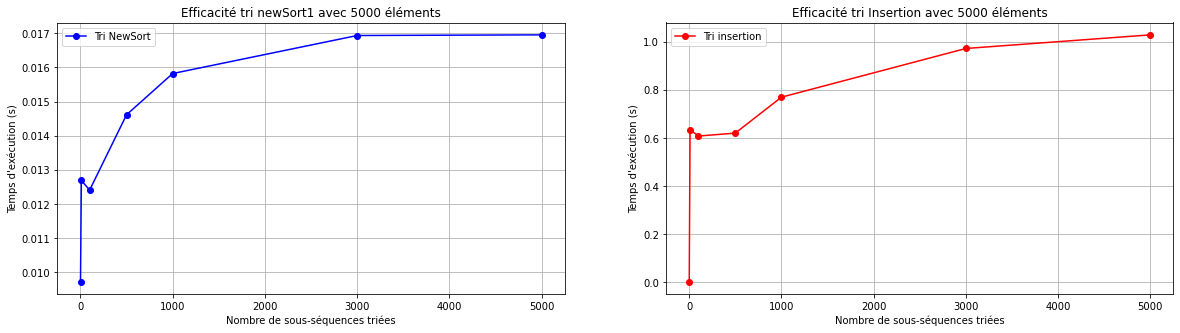

In [16]:
time_insertion = []
time_newSort = []
numberOfPartition = [1, 10, 100, 500, 1000, 3000, 5000]
numberOfElement = 5000
iteration = 10
for p in numberOfPartition:
        
    intervalTI = 0
    intervalNS = 0
    
    for i in range(iteration):
        
        T = fabriquerSousSequenceTrie(numberOfElement, p, -numberOfElement, numberOfElement)

        start = time.perf_counter()
        triInsertion(T[:], numberOfElement)
        end = time.perf_counter() - start
        intervalTI += end

        start = time.perf_counter()
        newSort(T[:], numberOfElement)
        end = time.perf_counter() - start
        intervalNS += end
    
    time_insertion.append(intervalTI/iteration)
    time_newSort.append(intervalNS/iteration)
   
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(numberOfPartition, time_newSort, 'o-b', label = 'Tri NewSort')
plt.grid()
plt.title("Efficacité tri newSort1 avec 5000 éléments")
plt.xlabel("Nombre de sous-séquences triées")
plt.ylabel("Temps d'exécution (s)")
plt.legend()

plt.subplot(122)
plt.plot(numberOfPartition, time_insertion, 'o-r', label="Tri insertion")
plt.grid()
plt.title("Efficacité tri Insertion avec 5000 éléments")
plt.xlabel("Nombre de sous-séquences triées")
plt.ylabel("Temps d'exécution (s)")
plt.legend()

plt.savefig("images/SortSousSequencesTriees.png")
plt.show()

Tri insertion récursif